Total Distance: 140 

Tour: [1, 3, 4, 5, 2, 1] 



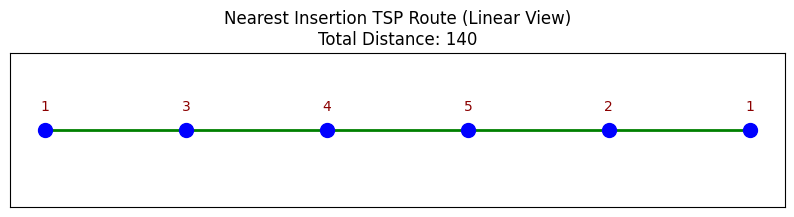

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def solve_tsp_with_nearest_insertion(distance_matrix, start=1, show_route=True):
    """
    Solve the TSP using the Nearest Insertion heuristic.

    Parameters:
    - distance_matrix (2D list or numpy array): Matrix of distances between cities.
    - start (int): The starting city (1-based index). Defaults to City 1.
    - show_route (bool): Whether to display the route plot. Defaults to True.
    """
    n = len(distance_matrix)
    unvisited = set(range(1, n + 1))  # Cities indexed from 1 to n
    tour = [start]  # Start from the specified city
    unvisited.remove(start)

    # Initialize by finding the closest city to the starting city
    nearest_city = min(unvisited, key=lambda city: distance_matrix[start - 1][city - 1])
    tour.append(nearest_city)
    unvisited.remove(nearest_city)

    # Construct the tour by nearest insertion
    while unvisited:
        # Find the closest unvisited city to any city in the current tour
        next_city, min_dist = None, float('inf')
        for city in unvisited:
            for in_tour_city in tour:
                dist = distance_matrix[city - 1][in_tour_city - 1]
                if dist < min_dist:
                    next_city, min_dist = city, dist

        # Find the best position to insert this city to minimize the increase in total distance
        best_position, min_increase = None, float('inf')
        for i in range(len(tour) - 1):
            increase = (
                distance_matrix[tour[i] - 1][next_city - 1]
                + distance_matrix[next_city - 1][tour[i + 1] - 1]
                - distance_matrix[tour[i] - 1][tour[i + 1] - 1]
            )
            if increase < min_increase:
                best_position, min_increase = i + 1, increase

        # Insert the next city at the best position
        tour.insert(best_position, next_city)
        unvisited.remove(next_city)

    # Return to the starting city
    tour.append(start)
    total_distance = sum(distance_matrix[tour[i] - 1][tour[i + 1] - 1] for i in range(len(tour) - 1))

    # Print results
    print("Total Distance:", total_distance, "\n")
    print("Tour:", tour, "\n")

    # Plot the route if show_route is True
    if show_route:
        plot_route_linear(tour, total_distance)

def plot_route_linear(tour, total_distance):
    """
    Plots the route in a line for the TSP.

    Parameters:
    - tour (list): The sequence of cities in the order visited, e.g., [1, 3, 4, 2, 1].
    - total_distance (float): Total distance of the tour.
    """
    # Generate positions along a line for each city in the order of the tour
    x_coords = list(range(1, len(tour) + 1))
    y_coords = [1] * len(tour)  # Constant y-coordinate for a linear view

    # Create a figure
    plt.figure(figsize=(10, 2))
    plt.title(f"Nearest Insertion TSP Route (Linear View)\nTotal Distance: {total_distance}")

    # Plot each city in the order of the tour
    plt.scatter(x_coords, y_coords, color='blue', s=100, zorder=5)

    # Annotate each city with its index
    for i, (x, y) in enumerate(zip(x_coords, y_coords)):
        plt.text(x, y + 0.05, f'{tour[i]}', ha='center', color='darkred')

    # Draw lines between cities in the order of the tour
    for idx in range(len(tour) - 1):
        plt.plot([x_coords[idx], x_coords[idx + 1]], [1, 1], color='green', linestyle='-', linewidth=2)

    # Set plot limits and remove the y-axis for a clean linear view
    plt.ylim(0.8, 1.2)
    plt.xlabel("Cities")
    plt.gca().get_yaxis().set_visible(False)
    plt.gca().get_xaxis().set_visible(False)
    plt.show()


# Example usage
if __name__ == "__main__":
    distance_matrix = [
        [0, 10, 35, 25, 60],
        [10, 0, 30, 55, 20],
        [35, 30, 0, 45, 50],
        [25, 55, 45, 0, 30],
        [60, 20, 50, 30, 0]
    ]

    # Call the function to display the best route from multiple starting points
    solve_tsp_with_nearest_insertion(distance_matrix, start=1, show_route=True)